# Lab-1:

> Importing all the necessary libraries

In [226]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_theme(color_codes=True)
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [227]:
df.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

> There are no missing values in the dataset

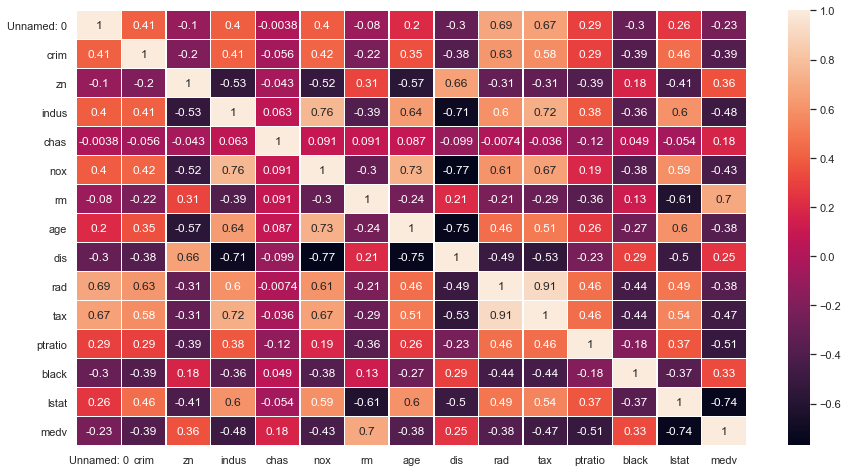

In [228]:
plt.figure(figsize=(15,8))
ax = sb.heatmap(df.corr(),linewidths=.5, annot=True)

> The above graph is a heatmap of the correlations of the attributes present in the dataset

# Exercise 2:

# Question 1: Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 

In [229]:
df.corr()['medv'].abs().sort_values(ascending=False).head(6)

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
Name: medv, dtype: float64

>Hence the best 5 features to predict 'MEDV' from the given dataset are:
>    - lstat
>    - rm
>    - ptratio
>    - indus
>    - tax

# Question 2: Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features.  (from sklearn.linear_model import LinearRegression)

In [230]:
reg = LinearRegression()
x=df[['lstat','rm','ptratio']]
y = df[['medv']]
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=1)
reg.fit(x_train,y_train)

LinearRegression()

<AxesSubplot:xlabel='ptratio'>

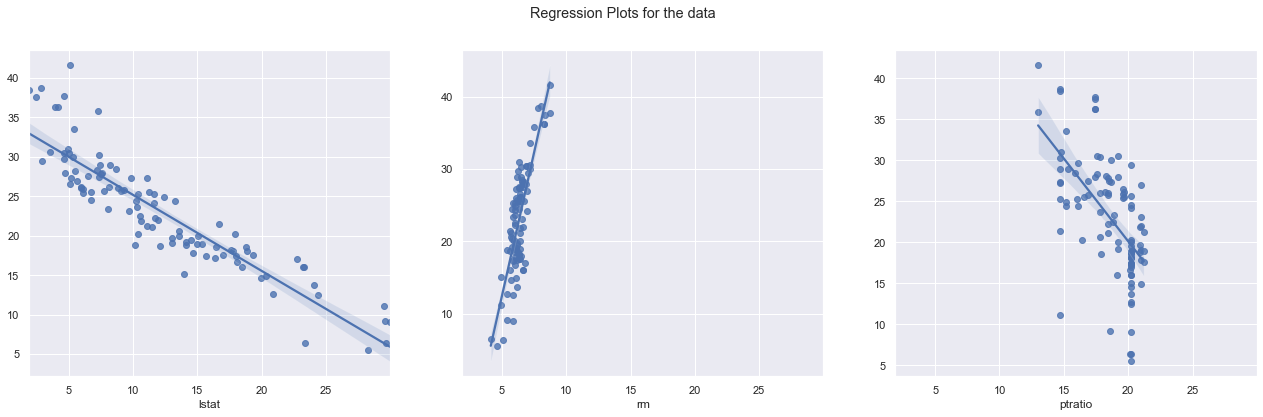

In [231]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(22,6))
fig.suptitle('Regression Plots for the data')
sb.regplot(ax=axes[0],x=x_test['lstat'],y=reg.predict(x_test))
sb.regplot(ax=axes[1],x=x_test['rm'],y=reg.predict(x_test))
sb.regplot(ax=axes[2],x=x_test['ptratio'],y=reg.predict(x_test))

In [ ]:
sb.pairplot

# Question 3: Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [232]:
y_pred = reg.predict(x_test)

In [233]:
r2_score(y_pred=y_pred,y_true=y_test)

0.6959056368091425

> Hence the R-Sqaure score for the model is 0.6959